# Multi-layer Neural Networks

McCulloch-Pitts networks and perceptrons are called single-layer networks becaues they do not contain a hidden layer. In order to accomplish more complicated tasks, we will have to work with multi-layer networks, which contain one or more hidden layers. The simple learning algorithm we made use of in the previous section will also not work with multi-layer networks: now we will have to make use of the backpropagation algorithm (which unfortunately, will include a little bit of math).

Before we go into the backpropagation algorithm, we will also have to know the concepts of the sigmoid function, the cost function, and gradient descent.

Note: The matplotlib library will also be used whenever applicable, so you can take a look at the code to get some intuition on how to plot graphs using python! :)

## Sigmoid Function

In the previous section, we have made use of a simple learning algorithm using the step function (graph shown below).

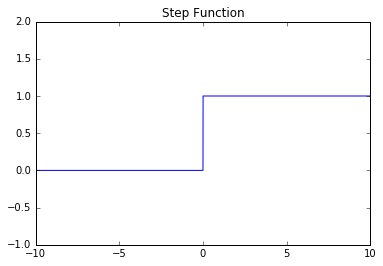

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.001)
y = 0.5 * (np.sign(x) + 1)

plt.plot(x, y)
plt.axis([-10, 10, -1, 2])
plt.title('Step Function')
plt.show()

Since the output of the perceptrons (i.e. step function) can only be either 0 or 1, it would not be very practical in real-world applications. What we want instead is a small change in output whenever we have a small change in the weights. Therefore, the sigmoid function is an activation function that is commonly used. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}\\$$


where $z = w^{T} \cdot x$

(where $w=[w_{0}, w_{1}, \dots ,w_{n}]$, with $w_{0}$ being the bias, and $x=[x_{0}, x_{1}, \dots ,x_{n}]$, with $x_{0}=1$)

The graph of the sigmoid function is shown below.

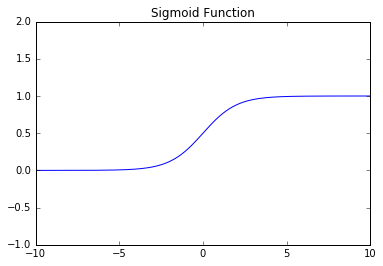

In [3]:
x = np.arange(-10, 10, 0.001)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.axis([-10, 10, -1, 2])
plt.title('Sigmoid Function')
plt.show()

So now, instead of just sending the sums of products $(w \cdot x)$ to the next layer, we will first pass it through the sigmoid function. We will denote this value as the activation $a$, that is, $a = g(w \cdot x)$.

Notice that for a very large positive number, $g(z)$ is approximately 1, and for a large negative number, $g(z)$ is approximately 0. So superficially, the sigmoid function behaves similarly to the step function for large numbers.

We will go into other activation functions later in the tutorial. For now, let us focus on the sigmoid function.

## The Cost Function

Let us recap what we know so far and try to look at the bigger picture before we go into the backpropagation algorithm.

As you know, for any neural network we are given a set of inputs and expected outputs which we can train the network with. Our goal is to find a set of weights that best fits the data, that is, a set of weights that gives a highest classification accuracy of the output. We can measure how good a set of weight 'fits' the data by using a cost function (also called an error function or a loss function). That is, a lower cost function corresponds to a lower error and thus, better performance of the network. **Our goal in training neural networks is to optimize the weights in such a way that the cost function (i.e. errors) is at a minimum.**

There are many cost functions available, but we are going to use the cross-entropy error function. It is defined as follows:

$$ J(z) = -y\log(g(z)) - (1-y)\log(1-(g(z)))$$

where $y$ is the actual output and $g(z)=g(w \cdot x)$ is our network's output.

Our multi-layer neural network outputs values from 0 to 1 according to the probability that something is a "yes" or "no." Think of a simple classification system in which we are trying to classify whether an image contains a person or not. Our network would output values close to 1 if it thinks the image contains a person, and close to 0 otherwise.

Let's say in a training example, the image contains a person, so the expected output is y = 1. You can see that the second term of the cost function, (1-(1))\*log(1-(g(z)), disappears, and only the first term, -(1)\*log(g(z)), is left. Let's see the graph of this.

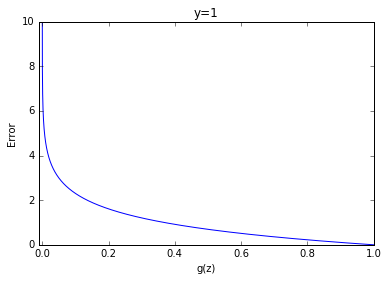

In [25]:
# Graph of -log(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=1')
plt.show()

Our network's output is on the x-axis. As you can observe, if y=1, the closer g(z) is to 0, the higher the cost--the higher the error. This means that the weights are probably not very good. On the other hand, If y=1 and our network's output is also 1, the error would be 0.

Now let as look at the case where y=0: a training example that doesn't contain a person in the image. Now the first term of the cost function disappears, leaving only the term -(1-(0))\*log(1-(g(z)). The graph of this is plotted below.

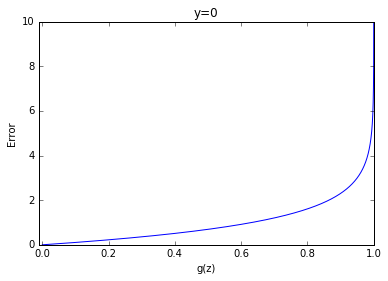

In [24]:
# Graph of -log(1-(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(1-x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=0')
plt.show()

In a similar vein, if the network's output is 0, the error will be 0. However, the closer the network's output is to 1, the higher the error is.

To repeat, we'd like a set of weights that will minimize the error the entire training set. So actually, the function is also divided by the number of examples to get the average, and it becomes:

$$ J = -\frac{1}{N}\sum_{n=1}^{N}[-y\log(g(z)) - (1-y)\log(1-(g(z)))]$$

Now, let's see how we can optimize the weights!

## Gradient Descent

There are plenty of optimization algorithms, but the most common and essential one is *gradient descent*.

Essentially, a gradient is a vector of partial derivatives of a given function. We can use the gradient descent algorithm to 